### Исследование рынка компьютерных игр
-----------
* Сборный проект 1-го модуля

### Шаг 1. Импорт данных

In [1]:
# импортируем необходимые библиотеки
# и ознакомимся с данными 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', None)

games = pd.read_csv('/datasets/games.csv', sep=',')
rating = pd.read_csv('/datasets/rating.csv', sep=',')

### Шаг 2. Предобработка данных

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [5]:
# Заменим названия столбцов так, чтобы они начинались со строчных букв
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_players',
       'eu_players', 'ru_players', 'other_players', 'critic_score',
       'user_score', 'rating']

In [6]:
# Преобразуем значения столбцов к нижнему регистру
games_column = ['name', 'platform', 'genre', 'user_score', 'rating']
for column in games_column:
    games[column]=games[column].str.lower()

games.head()

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Проверка, подсчет количества NaN - значений во всех столбцах
games.isna().sum(axis=0)

name                  2
platform              0
year_of_release     269
genre                 2
na_players            0
eu_players            0
ru_players            0
other_players         0
critic_score       8582
user_score         6704
rating             6769
dtype: int64

* В столбцах `name` и `genre` содержатся пропуски, которые можно удалить - их совсем не много
* пропуски в столбце с датой релиза `year_of_release` заменим на специальные значения `999` 
* пропуски в оценках пользователей `user_score` и критиков `critic_score` заменим на `-1` - что позволит выделить эти данные в отдельную группу 
* пропуски в стоблце `rating` заменим на значение `rp` - рейтинг ожидается (т.е неизвестен на момент анализа) 

In [8]:
games.shape[0]

16719

In [9]:
# создадим функцию для замены пропущенных значений 
def placeholder(df, column, surrogate):
    df[column].fillna(surrogate, inplace=True)

# Заменим пропуски в столбце "rating" на значения "rp" - рейтинг ожидается
placeholder(games, 'rating', 'rp')
# Заменим пропуски в столбце 'user_score' 
placeholder(games, 'user_score', -1)
# Заменим пропуски в столбце 'critic_score'
placeholder(games, 'critic_score', -1)
# Заменим пропуски в столбце 'year_of_release'
placeholder(games, 'year_of_release', 999)
# Удалим пропуски в 'name' и 'genre'
games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['genre'], inplace=True)

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 11 columns):
name               16717 non-null object
platform           16717 non-null object
year_of_release    16717 non-null float64
genre              16717 non-null object
na_players         16717 non-null float64
eu_players         16717 non-null float64
ru_players         16717 non-null float64
other_players      16717 non-null float64
critic_score       16717 non-null float64
user_score         16717 non-null object
rating             16717 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
# приведем к целочисленному типу "int" 
games['year_of_release'] = games['year_of_release'].astype('int64')
#games['user_score'] = games['user_score'].astype('float64')

* При попытке изменения типа данных столбца `user_score` появляется ошибка `ValueError: could not convert string to float: 'tbd'`

`
games['user_score'] = games['user_score'].astype('float64')
`
* Сделам срез и рассчитаем сколько таких значений 

In [12]:
games.query('user_score =="tbd"').shape[0]

2425

* Получается, что для 2425 строк не определена оценка пользователей 

* Значения (tbd) в "user_score", заменим на "-1", так как этом можно считать пропуском -- рейтинг неизвестен

In [13]:
# Проведем замену "tbd" на ""-1"
games.loc[games['user_score']=='tbd', 'user_score'] = -1
# приведем к целочисленному типу "int" 
games['user_score'] = games['user_score'].astype('float64')

In [14]:
# проверим полные дубликаты 
games.duplicated().sum()

0

In [15]:
# Добавим столбец с данными о количестве продаж по всем регионам
games['total_players'] = games['na_players'] + games['eu_players'] + games['ru_players'] + games['other_players']

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 12 columns):
name               16717 non-null object
platform           16717 non-null object
year_of_release    16717 non-null int64
genre              16717 non-null object
na_players         16717 non-null float64
eu_players         16717 non-null float64
ru_players         16717 non-null float64
other_players      16717 non-null float64
critic_score       16717 non-null float64
user_score         16717 non-null float64
rating             16717 non-null object
total_players      16717 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


#### Шаг 3. Исследовательский анализ данных

* Постройте распределение по годам релиза и опишите полученный результат
* Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
* Постройте график продаж по каждому году; сделайте вывод
* Постройте ящик с усами по глобальным продажам, опишите полученный результат
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками.

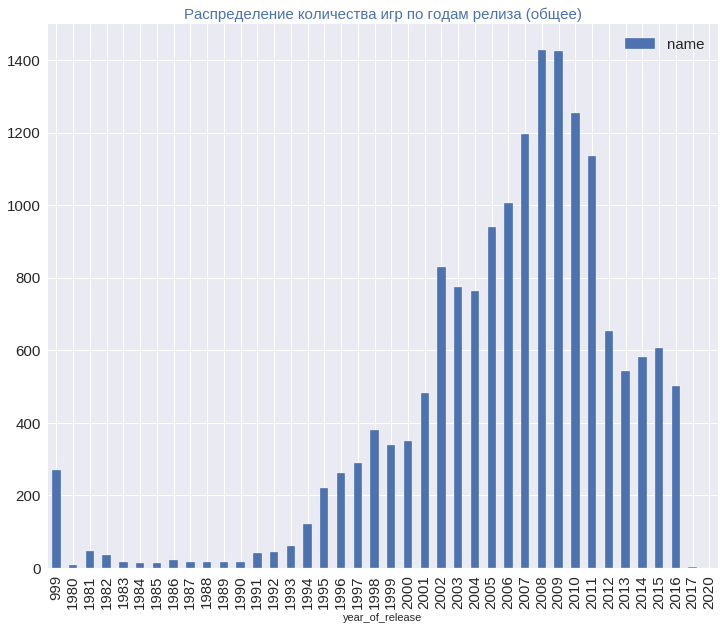

In [17]:
# Распределение количества игр по годам релиза
(games
   .pivot_table(index='year_of_release', values=['name'],
                aggfunc='count')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='b')
)
plt.title('Распределение количества игр по годам релиза (общее)', fontsize=15, color='b')
plt.legend(fontsize=15);


##### Вывод:
* Начиная с 1993 года наблюдается резкий рост количества выпускаемых игр, максимум достигается в 2008-2009 году, после чего происходит резкий обвал рынка -- количество выпускаемых игр в год быстро убывает
* Количество игр, год релиза для которых неизвестен, находится примерно на уровне 1997 года

In [18]:
# Создадим функцию для группировки игр по наличию отзыва
# если ячейки в столбцах с отзывами критиков и пользователей одновременно будут содержать значения < 0
# которые появились после замены пропусков
def category_of_score(row):
    critic_score = row['critic_score']
    user_score = row['user_score']
    if critic_score < 0 and user_score < 0:
        return 'без отзыва'
    return 'с отзывом'

# Создадим новый столбец с категориями, применив функцию к датафрейму
games['score_category'] = games.apply(category_of_score, axis=1)    
 

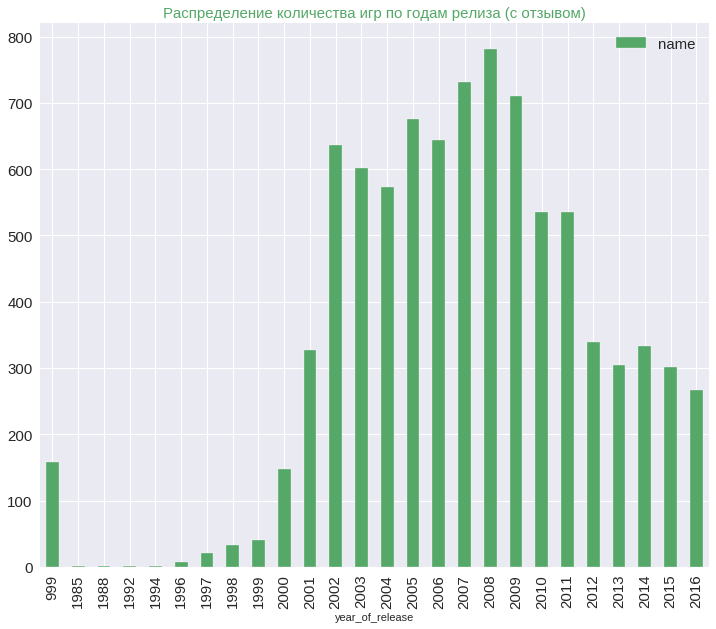

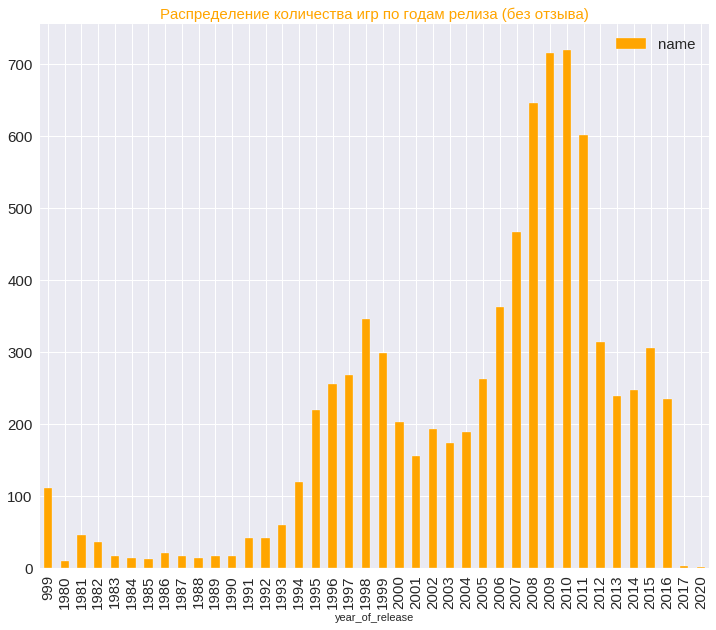

In [19]:
# С отзывом
games_score = (games
               .query('score_category == "с отзывом"')
               .pivot_table(index='year_of_release', values=['name'],
                            aggfunc='count')
               .sort_values(by='year_of_release', ascending=True)
               .plot(kind='bar',figsize=(12, 10), fontsize=15, color='g')
              )
plt.title('Распределение количества игр по годам релиза (c отзывом)', fontsize=15, color='g')
plt.legend(fontsize=15);
              
# Без отзыва
games_no_score = (games
               .query('score_category == "без отзыва"')
               .pivot_table(index='year_of_release', values=['name'],
                            aggfunc='count')
               .sort_values(by='year_of_release', ascending=True)
               .plot(kind='bar',figsize=(12, 10), fontsize=15, color='orange')
              )
plt.title('Распределение количества игр по годам релиза (без отзыва)', fontsize=15, color='orange')
plt.legend(fontsize=15);

##### Вывод:
* Количество игр без отзыва больше чем с отзывом
* Распределения отличаются друг от друга:
  * Распределение количества игр с отзывом не похоже на нормальное
  * Распределение количества игр без отзыва имеет "провал", обусловленный "удалением" количества игр с отзывом
* С 2000 года количество игр с отзывом начало расти

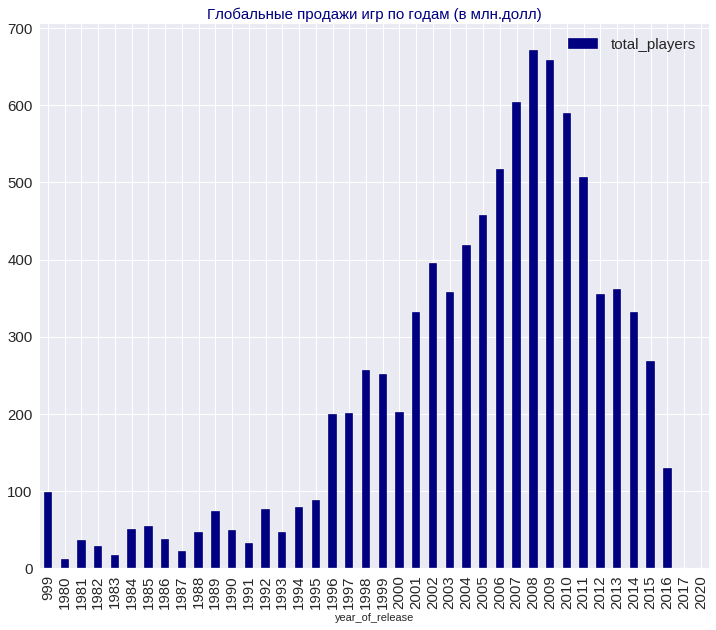

In [20]:
(games
   .pivot_table(index='year_of_release', values='total_players',
                aggfunc='sum')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Глобальные продажи игр по годам (в млн.долл)', fontsize=15, color='navy')
plt.legend(fontsize=15);

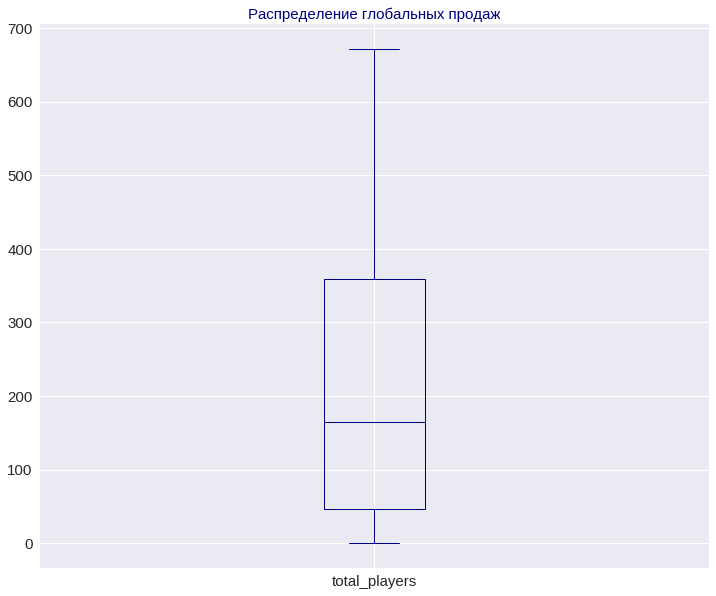

In [21]:
#games.boxplot(column='total_players')
(games
   .pivot_table(index='year_of_release', values='total_players',
                aggfunc='sum')
   .plot(kind='box',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Распределение глобальных продаж', fontsize=15, color='navy');


* **Медианное значение глобальных продаж игр расположено около 180 млн.долл**
* **Распределение глобальных продаж по годам (в млн.долл) показывает, что в период с 1996 по 2008 год был бешенный рост**
* **пик пришелся на 2008 год (более 650 млн.долл), после чего наблюдалось такое же резкое падение продаж и выручки** 
* Возможно, что падение обусловлено мировым финасовым кризисом 2008-2009 гг. 
* Дальнейшее снижение может быть также связано с оттоком пользователей, например к мобильным играм или онлайн-играм

In [22]:
# Узнайте, на какой платформе было выпущено больше всего игр
games['platform'].value_counts().sort_values(ascending = False).head()


ps2     2161
ds      2152
ps3     1331
wii     1320
x360    1262
Name: platform, dtype: int64

* **Больше всего игр было выпущено на платформе `ps2` (PlayStation2)**

In [23]:
# Определите, игр какого жанра больше всего
games['genre'].value_counts().sort_values(ascending = False).head()

action          3370
sports          2348
misc            1750
role-playing    1500
shooter         1323
Name: genre, dtype: int64

* **Лидерами являются игры жанра `экшн`** 

In [24]:
# Наименьшая оценка пользователей
(games
 .query('user_score > 0')
 .pivot_table(index='name', values='user_score', aggfunc='min')
 .sort_values(by='user_score', ascending=True)
 .head()
)


,user_score
name,
madden nfl 17,0.2
myth makers: trixie in toyland,0.2
billy the wizard: rocket broomstick racing,0.3
happy feet,0.3
power gig: rise of the sixstring,0.5


In [25]:
# Наибольшая оценка пользователей
(games
 .query('user_score > 0')
 .pivot_table(index='name', values='user_score', aggfunc='max')
 .sort_values(by='user_score', ascending=False)
 .head()
)

,user_score
name,
breath of fire iii,9.7
boktai: the sun is in your hand,9.6
harvest moon: friends of mineral town,9.6
karnaaj rally,9.5
super puzzle fighter ii,9.5


 ##### Вывод
 *Шкала 0 - 10 баллов*
 * Наименьшую оценку: `0.2`, пользователи поставили двум играм:      
 **madden nfl 17** и **myth makers: trixie in toyland**
-----------------
 * Наибольшую оценку: `9.7`, пользователи поставили игре **breath of fire iii**

In [26]:
# Наименьшая оценка критиков
(games
 .query('critic_score > 0')
 .pivot_table(index='name', values='critic_score', aggfunc='min')
 .sort_values(by='critic_score', ascending=True)
 .head()
)

,critic_score
name,
ride to hell,13.0
leisure suit larry: box office bust,17.0
rugby 15,19.0
nickelodeon party blast,19.0
anubis ii,19.0


In [27]:
# Наибольшая оценка критиков
(games
 .query('critic_score > 0')
 .pivot_table(index='name', values='critic_score', aggfunc='max')
 .sort_values(by='critic_score', ascending=False)
 .head()
)

,critic_score
name,
grand theft auto iv,98.0
soulcalibur,98.0
tony hawk's pro skater 2,98.0
halo: combat evolved,97.0
nfl 2k1,97.0


 ##### Вывод
 
 *Шкала 0 - 100 баллов*

 * Наименьшую оценку: `13`, критики поставили игре: **ride to hell**
-----------------
 * Наибольшую оценку: `98`, критики поставили сразу 3-м играм **grand theft auto iv**,  **soulcalibur**,  **tony hawk's pro skater 2**

Количество объектов в выборке: 4471

              critic_score  user_score
critic_score         1.000       0.632
user_score           0.632       1.000


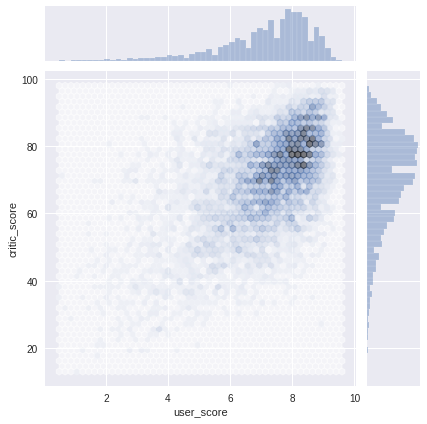

In [28]:
# Оцените корреляцию между оценками критиков и пользовательскими оценками.
data = (games
         .query('critic_score > 0 and user_score > 0')
         .pivot_table(index='name', 
            values=['user_score', 'critic_score'], 
            aggfunc='mean') 
       )
print('Количество объектов в выборке:', data.shape[0])
print()
print(data.corr().round(decimals=3))

score_flt = games.query('critic_score > 0 and user_score > 0')

sns.jointplot(x='user_score', y='critic_score', data=score_flt, kind='hex', bins=50, alpha=0.5);

 * Корреляция между оценками пользователей и критиков средняя (не сильная, но и не слабая) - 63 %
 * Оценки пользователей и критиков в большинстве случаев сходятся, особенно это заметно для высоких оценок, которых большинство: ("облако" расположено близко к диагонали)
 * При этом лидеры и аутсайдеры у пользователей и критиков различаются

#### Шаг 4. Составьте портрет пользователя для каждого региона


* Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
* топ-5 предпочтительных жанров
* в какие года пользователи были наиболее активны (больше всего покупали игры)
* топ-5 предпочтительных платформ
* какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

##### Северная Америка

In [29]:
# Функция для вывода Топ-5 значений
# на вход принимает parametre (жанр или платформу)
# column (продажи в млн.долл по региону, например Северная Америка)
# aggf (агрегирующая функция - сумма продаж по заданному параметру)
def top_rating(parameter, column, aggf):
    games_id = games.pivot_table(index=parameter, values=column, aggfunc=[aggf])
    return games_id.sort_values(by=(aggf, column), ascending=False).head()

In [30]:
# Топ-5 жанров
top_rating('genre', 'na_players', 'sum')

,sum
,na_players
genre,
action,879.01
sports,684.43
shooter,592.24
platform,445.50
misc,407.27


In [31]:
# Топ-5 платформ
top_rating('platform', 'na_players', 'sum')

,sum
,na_players
platform,
x360,602.47
ps2,583.84
wii,496.90
ps3,393.49
ds,382.67


In [32]:
# Топ-5 рейтинг ESRB
top_rating('rating', 'na_players', 'sum')

,sum
,na_players
rating,
e,1293.26
rp,1240.68
t,759.75
m,748.48
e10+,353.32


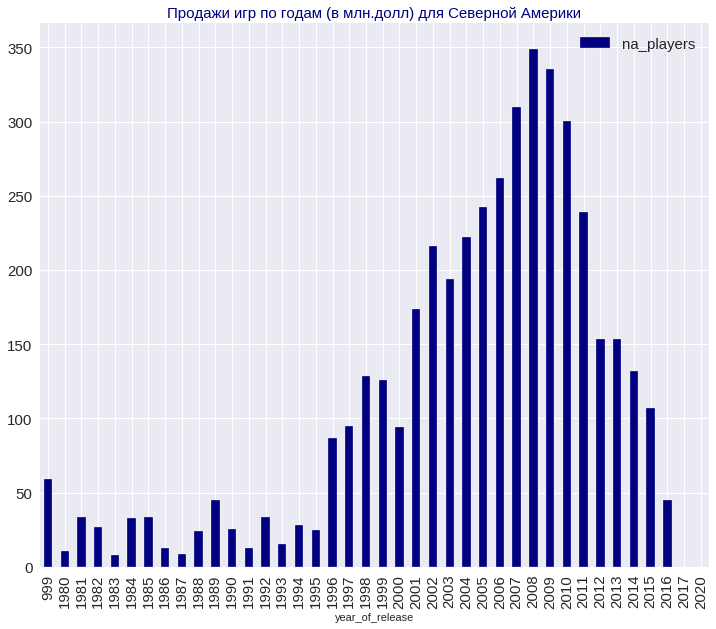

In [33]:
# Распределение покупок пользователей по годам
(games
   .pivot_table(index='year_of_release', values='na_players',
                aggfunc='sum')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Продажи игр по годам (в млн.долл) для Северной Америки', fontsize=15, color='navy')
plt.legend(fontsize=15);

##### портрет пользователя: Северная Америка:
* Топ-5 жанров: **action**,	sports,	shooter, platform, misc
* Топ-5 платформ: **x360**, ps2, wii, ps3, ds	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2006-2010

#### Для Европы

In [34]:
# Топ-5 жанров
top_rating('genre', 'eu_players', 'sum')

,sum
,eu_players
genre,
action,519.13
sports,376.79
shooter,317.34
racing,236.51
misc,212.74


In [35]:
# Топ-5 платформ
top_rating('platform', 'eu_players', 'sum')

,sum
,eu_players
platform,
ps2,339.29
ps3,330.29
x360,270.76
wii,262.21
ps,213.61


In [36]:
# Топ-5 рейтинг ESRB
top_rating('rating', 'eu_players', 'sum')

,sum
,eu_players
rating,
e,710.25
rp,613.38
m,483.97
t,427.03
e10+,188.52


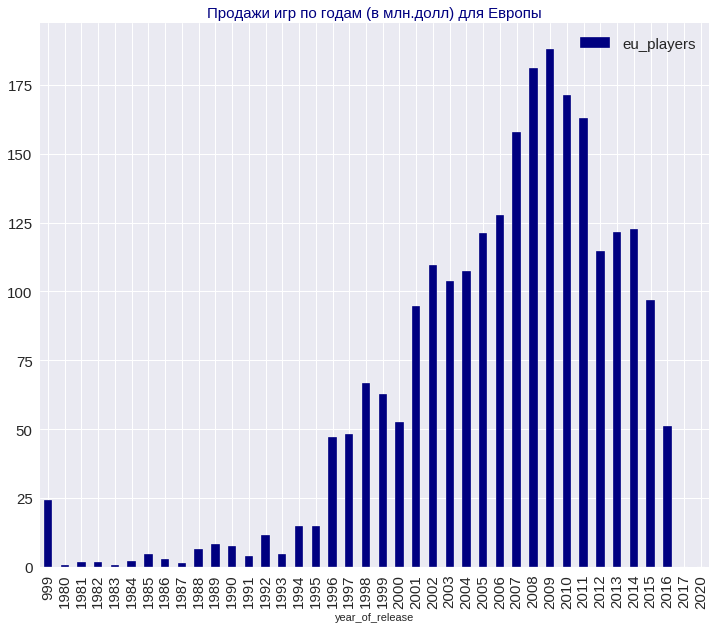

In [37]:
# Распределение покупок пользователей по годам
(games
   .pivot_table(index='year_of_release', values='eu_players',
                aggfunc='sum')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Продажи игр по годам (в млн.долл) для Европы', fontsize=15, color='navy')
plt.legend(fontsize=15);

##### портрет пользователя: Европа:
* Топ-5 жанров: **action**,	sports,	shooter, racing, misc
* Топ-5 платформ: **ps2**, ps3, x360,	wii, ps	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2007-2011

#### Для России

In [38]:
# Топ-5 жанров
top_rating('genre', 'ru_players', 'sum')

,sum
,ru_players
genre,
role-playing,355.46
action,161.44
sports,135.54
platform,130.83
misc,108.11


In [39]:
# Топ-5 платформ
top_rating('platform', 'ru_players', 'sum')

,sum
,ru_players
platform,
ds,175.57
ps,139.82
ps2,139.20
snes,116.55
3ds,100.67


In [40]:
# Топ-5 рейтинг ESRB
top_rating('rating', 'ru_players', 'sum')

,sum
,ru_players
rating,
rp,841.99
e,198.11
t,151.40
m,64.24
e10+,40.20


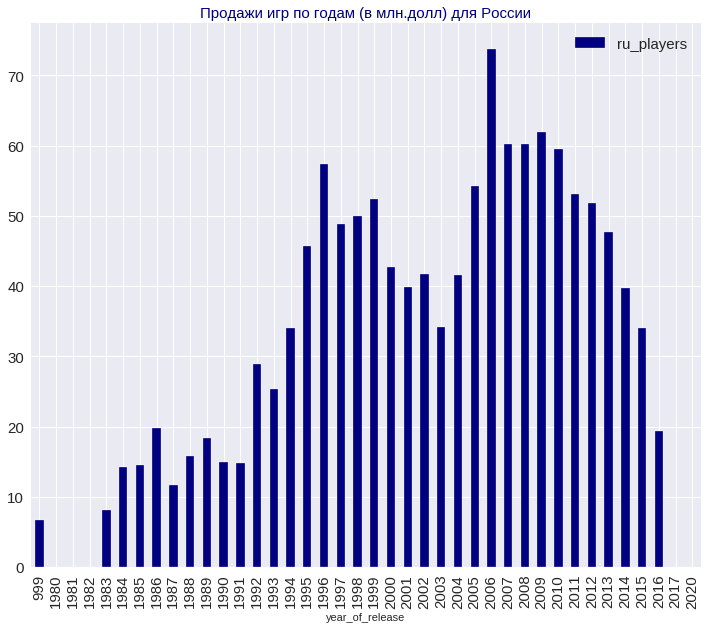

In [41]:
# Распределение покупок пользователей по годам
(games
   .pivot_table(index='year_of_release', values='ru_players',
                aggfunc='sum')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Продажи игр по годам (в млн.долл) для России', fontsize=15, color='navy')
plt.legend(fontsize=15);

##### портрет пользователя: Россия:
* Топ-5 жанров: **role-playing**, action, sports, platform, misc
* Топ-5 платформ: **ds**,ps, ps2, snes, 3ds		
* рейтинг ESRB (категория игр): рейтинг ожидается, затем **"Для всех"**
* Годы наибольшей покупательской активности:  1996, 1999, 2005, 2006 

#### Другие страны

In [42]:
# Топ-5 жанров
top_rating('genre', 'other_players', 'sum')

,sum
,other_players
genre,
action,184.60
sports,134.51
shooter,104.11
racing,76.10
misc,74.39


In [43]:
# Топ-5 платформ
top_rating('platform', 'other_players', 'sum')

,sum
,other_players
platform,
ps2,193.44
ps3,135.68
x360,85.76
wii,79.07
ds,59.28


In [44]:
# Топ-5 рейтинг ESRB
top_rating('rating', 'other_players', 'sum')

,sum
,other_players
rating,
e,234.19
m,177.10
t,155.17
rp,151.01
e10+,73.56


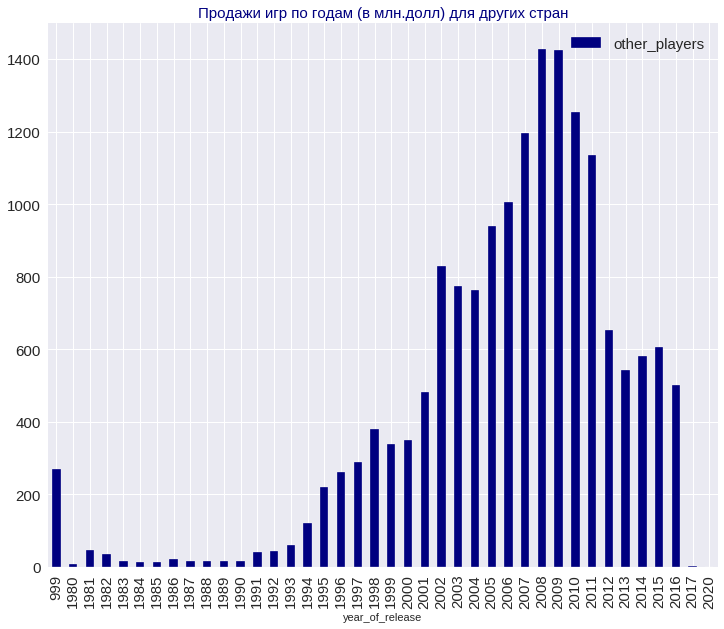

In [45]:
# Распределение покупок пользователей по годам
(games
   .pivot_table(index='year_of_release', values='other_players',
                aggfunc='count')
   .sort_values(by='year_of_release', ascending=True)
   .plot(kind='bar',figsize=(12, 10), fontsize=15, color='navy')
)
plt.title('Продажи игр по годам (в млн.долл) для других стран', fontsize=15, color='navy')
plt.legend(fontsize=15);

##### портрет пользователя: Другие страны:
* Топ-5 жанров: **action**,	sports,	shooter, racing, misc
* Топ-5 платформ: **ps2**, ps3, x360, wii, ds	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2007-2011

### Шаг 5.  Гипотезы

* средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
* средний пользовательский рейтинг жанров Action и Sports различается.

In [46]:
# Создадим выборку по условиям для платформы ps2
games_ps2 = games.query('user_score > 0 and platform=="ps2"')
games_ps2_final = games_ps2['user_score']
# Создадим выборку по условиям для платформы ps3
games_ps3 = games.query('user_score > 0 and platform=="ps3"')
games_ps3_final = games_ps3['user_score']

# Создадим выборку по условиям для жанра Action
games_action = games.query('user_score > 0 and genre=="action"')
games_action_final = games_action['user_score']
# Создадим выборку по условиям для жанра Sport
games_sports = games.query('user_score > 0 and genre=="sports"')
games_sports_final = games_sports['user_score']

# Функция для проверки p-value

def ttest_independent(df1, df2):
    alpha = 0.05
    results = st.ttest_ind(df1, df2)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу, p-value:", results.pvalue)
    else:
        print("Не получилось отвергнуть нулевую гипотезу,  p-value:", results.pvalue)


#### Гипотезы о равенстве средних двух независимых совокупностей
* Будем проверять **средние пользовательские рейтинги** 
    * для игровых платформ PS2 и PS3
    * для жанров Action и Sports
* обозначим их `АR`( от англ. `average revenue`)


#### Платформы
-----------
* Нулевая гипотеза Н0: **AR(PS2) = AR(PS3)**

* Альтернативная гипотеза Н1: **AR(PS2) != AR(PS3)**
---------


In [47]:
# Проверяем гипотезу
ttest_independent(games_ps2_final, games_ps3_final)

Отвергаем нулевую гипотезу, p-value: 1.5742610791426753e-47


In [48]:
# Рассчитаем средние пользовательские рейтинги для игровых платформ ps2, ps3
print('Средний пользовательский рейтинг "PS2":', games_ps2_final.mean().round())
print('Средний пользовательский рейтинг "PS3":', games_ps3_final.mean().round())

Средний пользовательский рейтинг "PS2": 8.0
Средний пользовательский рейтинг "PS3": 7.0


#### Жанры
-----------
* Нулевая гипотеза Н0: **AR(Sports) = AR(Action)**

* Альтернативная гипотеза Н1: **AR(Sports) != AR(Action)**
---------


In [49]:
# Проверяем гипотезу
ttest_independent(games_action_final, games_sports_final)

Не получилось отвергнуть нулевую гипотезу,  p-value: 0.10406951359049141


In [50]:
print('Средний пользовательский рейтинг жанра "Sports":', games_sports_final.mean().round())
print('Средний пользовательский рейтинг жанра "Action":', games_action_final.mean().round())

Средний пользовательский рейтинг жанра "Sports": 7.0
Средний пользовательский рейтинг жанра "Action": 7.0


### Общий вывод:
---------------
#### 1) Общая характеристика
* Начиная **с 1993 года наблюдается резкий рост количества выпускаемых игр, максимум достигается в 2008-2009 году (более 650 млн.долл)**, после чего происходит резкий обвал рынка -- количество выпускаемых игр в год быстро убывает
  * Возможно, что падение обусловлено мировым финасовым кризисом 2008-2009 гг.
  * Дальнейшее снижение может быть также связано с оттоком пользователей, например к мобильным играм или онлайн-играм
* Медианное значение глобальных продаж игр расположено около 180 млн.долл
* **Больше всего игр было выпущено на платформе `ps2` (PlayStation2)**
* **Лидерами являются игры жанра `экшн`** 
---------
###### 1.1 пользовательская оценка
 *Шкала 0 - 10 баллов*
 * Наименьшую оценку: `0.2`, пользователи поставили двум играм:**madden nfl 17** и **myth makers: trixie in toyland**
 * Наибольшую оценку: `9.7`, пользователи поставили игре **breath of fire iii**
 --------------
###### 1.2 экспертная оценка
 *Шкала 0 - 100 баллов*
 * Наименьшую оценку: `13`, критики поставили игре: **ride to hell**
 * Наибольшую оценку: `98`, критики поставили сразу 3-м играм **grand theft auto iv**,  **soulcalibur**,  **tony hawk's pro skater 2**
------------
 * Корреляция между оценками пользователей и критиков средняя `63 %`
 * Лидеры и аутсайдеры у пользователей и критиков различаются
-------------
#### 2) Портрет пользователя
----------------
##### 2.1 Северная Америка:
* Топ-5 жанров: **action**,	sports,	shooter, platform, misc
* Топ-5 платформ: **x360**, ps2, wii, ps3, ds	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2006-2010
----------------------
##### 2.2 Европа:
* Топ-5 жанров: **action**,	sports,	shooter, racing, misc
* Топ-5 платформ: **ps2**, ps3, x360,	wii, ps	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2007-2011
-------------------------
##### 2.3 Россия:
* Топ-5 жанров: **role-playing**, action, sports, platform, misc
* Топ-5 платформ: **ds**,ps, ps2, snes, 3ds		
* рейтинг ESRB (категория игр): рейтинг ожидается, затем **"Для всех"**
* Годы наибольшей покупательской активности:  1996, 1999, 2005, 2006 
--------------------------
##### 2.4 Другие страны:
* Топ-5 жанров: **action**,	sports,	shooter, racing, misc
* Топ-5 платформ: **ps2**, ps3, x360, wii, ds	
* рейтинг ESRB (категория игр): **"Для всех"**
* Годы наибольшей покупательской активности: начиная с 1996, Топ-5: 2007-2011
-----------------
#### 3) Гипотезы
-----------------
#####  3.1 Платформы
-----------
* Нулевая гипотеза Н0: **AR(PS2) = AR(PS3)**

* Альтернативная гипотеза Н1: **AR(PS2) != AR(PS3)**
---------
* Отвергаем нулевую гипотезу, p-value: 1.5742610791426753e-47
* **Средний пользовательский рейтинг "PS2": 8.0**
* **Средний пользовательский рейтинг "PS3": 7.0**
##### 3.2 Жанры
-----------
* Нулевая гипотеза Н0: **AR(Sports) = AR(Action)**

* Альтернативная гипотеза Н1: **AR(Sports) != AR(Action)**
---------
* Не получилось отвергнуть нулевую гипотезу,  p-value: 0.10406951359049141
* **Средний пользовательский рейтинг жанра "Sports": 7.0**
* **Средний пользовательский рейтинг жанра "Action": 7.0**